In [ ]:
import keras
from keras.datasets import mnist
from keras import optimizers
from keras import applications
from keras.models import Sequential
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D, Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization,InputLayer,Input
from tensorflow.keras import layers, regularizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf

In [ ]:
# Establecer una semilla para reproducibilidad
seed_value = 42
random.seed(seed_value)# Semilla para Python
np.random.seed(seed_value) # Semilla para NumPy
tf.random.set_seed(seed_value) # Semilla para TensorFlow/Keras

In [ ]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os

image_size = 150
batch_size = 32
rescale_factor = 1./255

# Crear un generador para aumentar datos
train_datagen = ImageDataGenerator(
rescale=rescale_factor,# Normalizar los valores de los píxeles
shear_range=0.2,   # Rango para las transformaciones aleatorias
zoom_range=0.2,# Rango para el zoom aleatorio
horizontal_flip=True, # Activar el giro horizontal aleatorio
validation_split=0.2) # Establecer el porcentaje de imágenes para el conjunto de validación

# Cargar imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
"/content/drive/MyDrive/data1/train",  # Directorio con datos
target_size=(image_size, image_size), # Cambiar el tamaño de las imágenes a 50x50
batch_size=batch_size,
class_mode='categorical' # 'binary' para clasificación binaria, 'categorical' para multiclase
) # Seleccionar solo el conjunto de entrenamiento

# Cargar imágenes de validación
validation_generator = train_datagen.flow_from_directory(
"/content/drive/MyDrive/data1/validation",
target_size=(image_size, image_size),
batch_size=batch_size,
class_mode='categorical') # Seleccionar solo el conjunto de validación

Found 3078 images belonging to 5 classes.
Found 456 images belonging to 5 classes.


In [ ]:
#Uso del modelo vgg16 preentrenado
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(5, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.callbacks import EarlyStopping

# Configurar Early Stopping
early_stopping =EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

In [9]:


# Entrenar el modelo con Early Stopping

# Entrenar el modelo con Early Stopping
history_of_train =model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator

)

Epoch 1/50
97/97 [==============================] - 1735s 18s/step - loss: 0.8096 - accuracy: 0.6930 - val_loss: 0.4382 - val_accuracy: 0.8553
Epoch 2/50
97/97 [==============================] - 50s 516ms/step - loss: 0.3012 - accuracy: 0.8951 - val_loss: 0.3161 - val_accuracy: 0.8904
Epoch 3/50
97/97 [==============================] - 46s 477ms/step - loss: 0.2532 - accuracy: 0.9142 - val_loss: 0.2613 - val_accuracy: 0.9057
Epoch 4/50
97/97 [==============================] - 48s 490ms/step - loss: 0.1769 - accuracy: 0.9409 - val_loss: 0.3503 - val_accuracy: 0.8838
Epoch 5/50
97/97 [==============================] - 47s 487ms/step - loss: 0.1647 - accuracy: 0.9448 - val_loss: 0.3268 - val_accuracy: 0.8750
Epoch 6/50
97/97 [==============================] - 48s 498ms/step - loss: 0.1374 - accuracy: 0.9529 - val_loss: 0.2567 - val_accuracy: 0.9123
Epoch 7/50
97/97 [==============================] - 47s 479ms/step - loss: 0.0829 - accuracy: 0.9734 - val_loss: 0.2279 - val_accuracy: 0.9079

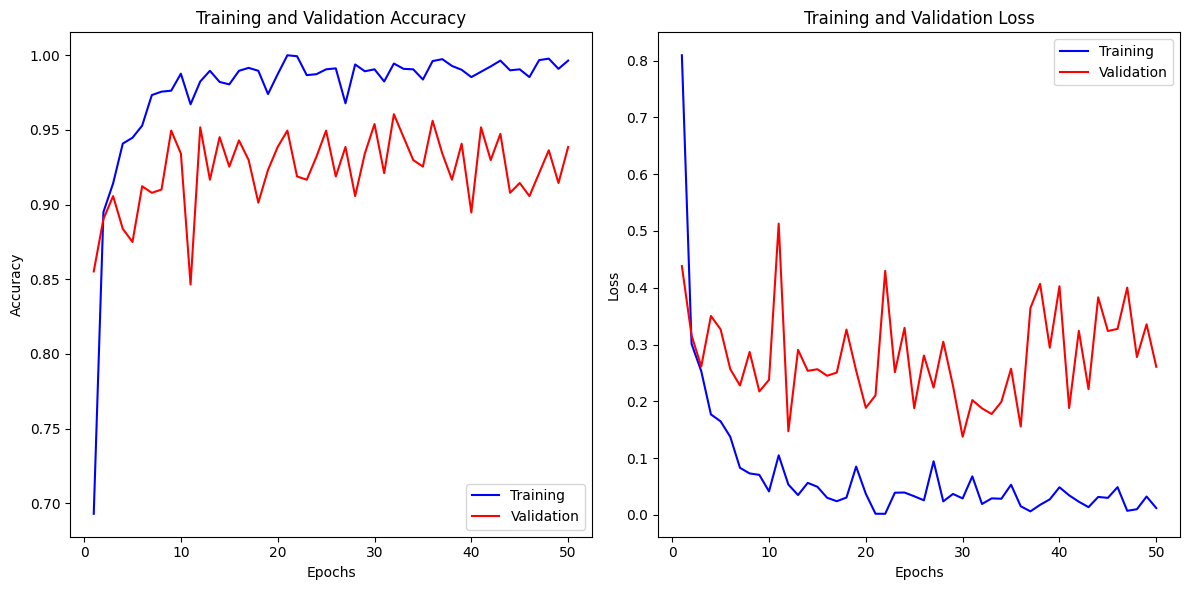

In [10]:
generatePlot(history_of_train)